# Personal Finance Planner

In [234]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np


%matplotlib inline

In [235]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [236]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [237]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [238]:
# Fetch current BTC price using requests.get() 
response_data_btc = requests.get(btc_url)

response_content_btc = response_data_btc.content

# API JSON response

btc_data = response_data_btc.json()

# print(json.dumps(btc_data, indent=4))

btc_price =btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

48625.0


In [239]:
# Fetch current ETH price using requests.get() 
response_data_eth=requests.get(eth_url)

response_content_eth =response_data_eth.content

eth_data = response_data_eth.json()

#print(json.dumps(eth_data, indent=4))

eth_price =eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)



3217.72


In [240]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


In [241]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58350.00
The current value of your 5.3 ETH is $17053.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [242]:
# Set current amount of shares for SPY and AGG
my_agg = 200
my_spy = 50

In [243]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object using the tradeapi.REST function from the Alpaca SDK.
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [244]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-01-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
my_df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame using .tail()
my_df_ticker.tail()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2021-08-23 00:00:00-04:00  116.09  116.180  116.0400  116.175  5580303   
2021-08-24 00:00:00-04:00  116.08  116.140  115.9600  115.980  4421916   
2021-08-25 00:00:00-04:00  115.99  116.011  115.6810  115.760  5204036   
2021-08-26 00:00:00-04:00  115.76  115.790  115.6444  115.785  4730638   
2021-08-27 00:00:00-04:00  115.81  116.100  115.7146  116.100  5361646   

                              SPY                                       
                             open     high       low   close    volume  
time                                                                    
2021-08-23 00:00:00-04:00  445.16  448.230  443.4355  447.26  49349485  
2021-08-24 00:00:00-04:00  447.97  448.540  447.4200  447.95  33180117  
2021-08-25 00:00:00-04:00  448.17  449.457  447.7700  448.88  35262175  
2021-08-26 00:00:00-04:00  448.61  448.860  446.1600  446.27  53455704  
2021-08-27 00:00:00-04:00  447.12  450.650  447.0600  450.19  54848833

In [297]:
# New Dataframe with most recent price
today_price_df= my_df_ticker.tail(1)

today_price_df

AGG                                        SPY  \
                             open   high       low  close     volume    open   
time                                                                           
2021-08-27 00:00:00-04:00  115.81  116.1  115.7146  116.1  5361646.0  447.12   

                                                               
                             high     low   close      volume  
time                                                           
2021-08-27 00:00:00-04:00  450.65  447.06  450.19  54848833.0

In [298]:
# Pick AGG and SPY close prices
agg_close_price = float(today_price_df["AGG"]["close"])
spy_close_price = float(today_price_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.1
Current SPY closing price: $450.19


In [248]:
# Compute the current value of shares by multipying my_agg and closing price 
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22509.50
The current value of your 200 AGG shares is $23220.00


### Savings Health Analysis

In [249]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data add values toether using "+".
crypto_holdings_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

#print(crypto_holdings_value) - #(Test))
# print(shares_value) - #(Test)

assets_value =[crypto_holdings_value, shares_value]
 

# Create savings DataFrame
df_assets=pd.DataFrame(assets_value,
                       columns =['Amount'],
                       index = ['Crypto', 'Shares'])

                       
# Display savings DataFrame
display(df_assets)


,Amount
Crypto,75403.916
Shares,45729.500


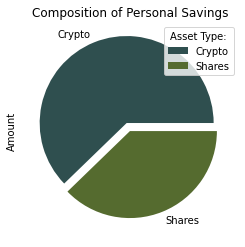

In [250]:
# Plot savings pie chart added colors and explode
myexplode = [0.1,0]
mycolors = ["#2F4F4F", "#556B2F"]

df_plt= df_assets.plot.pie(y='Amount', title="Composition of Personal Savings", explode = myexplode, colors= mycolors,)
df_plt.legend(title = "Asset Type:")



In [251]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_holdings_value + shares_value

#emergency_fund = total_savings 

# reaching goal taking the abs value of total_savings - emergency_fund
goal_savings= abs(total_savings - emergency_fund)

# Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations! Your portfolio balance is ${total_savings}.")
elif total_savings == emergency_fund:
    print(f"Congrats on reaching your financial goal! Keep on saving!")
elif total_savings < emergency_fund: 
    print(f" Your portfolio balance is ${total_savings}, you need about ${goal_savings} to reach your financal goal.")


Congratulations! Your portfolio balance is $121133.416.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [252]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-27', tz='America/New_York').isoformat()

In [260]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
my_df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
my_df_ticker.tail()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2021-08-23 00:00:00-04:00  116.09  116.180  116.0400  116.175  5580303.0   
2021-08-24 00:00:00-04:00  116.08  116.140  115.9600  115.980  4421916.0   
2021-08-25 00:00:00-04:00  115.99  116.011  115.6810  115.760  5204036.0   
2021-08-26 00:00:00-04:00  115.76  115.790  115.6444  115.785  4730638.0   
2021-08-27 00:00:00-04:00  115.81  116.100  115.7146  116.100  5361646.0   

                              SPY                                         
                             open     high       low   close      volume  
time                                                                      
2021-08-23 00:00:00-04:00  445.16  448.230  443.4355  447.26  49349485.0  
2021-08-24 00:00:00-04:00  447.97  448.540  447.4200  447.95  33180117.0  
2021-08-25 00:00:00-04:00  448.17  449.457  447.7700  448.88  35262175.0  
2021-08-26 00:00:00-04:00  448.61  448.860  446.1600  446.27  53455704.0  
2021-08-27 00:00:00-04:00  447.12  450.650  447.0600  450.19  54848833.0

In [266]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = my_df_ticker,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [267]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2017-09-07 00:00:00-04:00  110.43  110.66  110.42  110.58  1526058.0   
2017-09-08 00:00:00-04:00  110.54  110.58  110.43  110.43  2004746.0   
2017-09-11 00:00:00-04:00  110.27  110.29  110.10  110.14  1986181.0   
2017-09-12 00:00:00-04:00  110.04  110.06  109.92  109.98  1827871.0   
2017-09-13 00:00:00-04:00  110.00  110.04  109.86  109.86  1125316.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-09-07 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-09-08 00:00:00-04:00    -0.001356  246.53  247.11  246.30  246.55   
2017-09-11 00:00:00-04:00    -0.002626  248.04  249.30  248.02  249.17   
2017-09-12 00:00:00-04:00    -0.001453  249.63  250.07  249.42  250.07   
2017-09-13 00:00:00-04:00    -0.001091  249.73  250.21  249.59  250.18   

                                                    
                               volume daily_return  
time                                                
2017-09-07 00:00:00-04:00         NaN          NaN  
2017-09-08 00:00:00-04:00  39326387.0          NaN  
2017-09-11 00:00:00-04:00  48756933.0     0.010627  
2017-09-12 00:00:00-04:00  42765330.0     0.003612  
2017-09-13 00:00:00-04:00  30812116.0     0.000440

In [268]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996754,1.023544,1.001529,0.991015,0.986678,1.003719,1.001789,1.004360,1.008569,1.004132,...,0.999374,1.008304,1.000829,0.995199,1.000303,1.017888,1.005471,1.004698,0.999499,1.014958
2,1.003314,1.028877,1.008154,0.984607,0.977290,1.000129,0.999564,1.003966,1.015529,1.002812,...,0.993406,1.004954,0.993056,0.984414,0.998230,1.021116,1.013703,0.999396,0.995674,1.013119
3,1.002703,1.031612,1.000509,0.977985,0.967682,0.996969,1.009027,1.004415,1.019848,1.009060,...,0.999730,1.016944,0.980518,0.975397,1.014057,1.014989,1.002909,0.994355,0.993852,1.013759
4,1.010603,1.030439,0.990319,0.975993,0.961605,0.995871,0.997799,0.997623,1.019594,1.006272,...,1.005474,1.025710,0.977049,0.961703,0.993996,1.017762,1.007585,1.001569,0.990607,1.019211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.281077,21.467016,15.255425,10.137064,24.035704,27.322316,5.926253,17.396842,4.421026,32.075839,...,13.701388,25.246083,22.271910,27.285838,7.605381,38.198405,23.055365,27.370779,66.277893,34.915786
7557,16.378636,21.332513,15.144963,10.037434,23.609943,27.626165,5.869293,17.355407,4.344851,31.860980,...,13.664596,25.415680,22.146293,27.559819,7.723891,38.000134,23.388138,27.508424,66.139832,34.581939
7558,16.477811,21.353669,15.241125,10.109494,23.595675,27.889735,5.854715,17.473582,4.285232,31.672296,...,13.658503,25.553859,22.125958,27.640692,7.664463,37.982746,23.519415,27.305652,67.368222,34.725212
7559,16.455051,21.570908,15.227705,10.048040,23.541464,27.865741,5.882825,17.438144,4.299699,32.030334,...,13.781542,25.277458,22.220296,27.386423,7.675722,37.579075,23.556547,27.100812,66.693134,34.752076


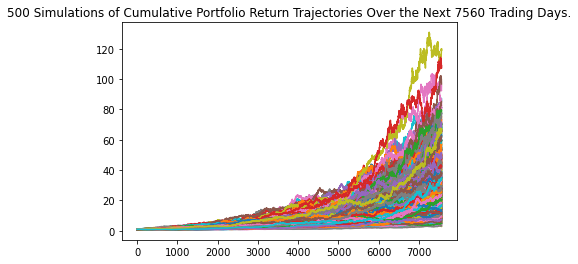

In [269]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

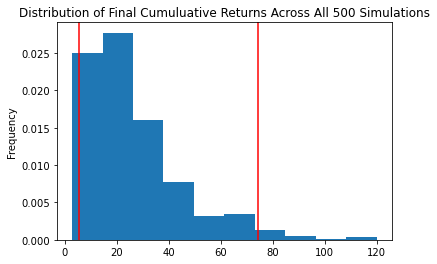

In [270]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [271]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_30tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(stats_30tbl)

count           500.000000
mean             26.619044
std              18.341159
min               2.921497
25%              13.396461
50%              21.952604
75%              33.664036
max             119.877878
95% CI Lower      5.669646
95% CI Upper     74.345671
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [278]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats_30tbl[8]*initial_investment,2)
ci_upper = round(stats_30tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $113392.91 and $1486913.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [280]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats_30tbl[8]*initial_investment2,2)
ci_upper = round(stats_30tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $170089.37 and $2230370.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [281]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = my_df_ticker,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [282]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988755,0.999633,0.996077,1.001625,0.998973,0.997741,1.011841,1.004748,0.998643,1.002133,...,0.999964,0.994841,0.992032,1.008707,0.997951,1.006532,0.992413,1.003805,1.009867,0.997710
2,0.991270,1.012174,0.993500,0.997423,0.990692,1.008631,1.000993,0.993915,1.006729,1.010919,...,0.999290,0.987096,0.964524,1.011778,0.995195,1.009962,0.970092,1.001237,1.011063,0.998024
3,0.999440,1.014178,0.986802,1.001255,0.977298,1.014043,1.012512,0.986415,1.002373,1.019718,...,1.003123,0.982528,0.949365,1.016387,0.994947,1.021041,0.973907,1.005116,1.014794,0.995196
4,1.007409,1.006918,0.977631,0.996022,0.981929,1.017582,0.997486,0.979416,1.005935,1.015173,...,0.996659,0.985023,0.939026,1.022313,0.986242,1.025495,0.987171,1.006826,1.010393,0.994474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.895762,0.879669,1.656638,0.855687,2.322431,1.122162,1.080546,1.230298,0.833719,1.862174,...,1.637489,2.383911,2.375690,1.481052,1.882809,1.538698,1.486073,1.273075,1.690698,1.788639
1257,2.926287,0.880143,1.646996,0.846573,2.291382,1.119829,1.068388,1.218928,0.822934,1.838682,...,1.651798,2.390083,2.372367,1.485102,1.885991,1.522799,1.482950,1.270986,1.727894,1.775596
1258,2.939682,0.875754,1.654891,0.849763,2.289754,1.121323,1.060327,1.236774,0.826175,1.851028,...,1.651053,2.410672,2.370579,1.476094,1.908666,1.520295,1.498056,1.286126,1.724557,1.765645
1259,2.953670,0.875612,1.665021,0.842583,2.286949,1.124455,1.065767,1.212711,0.825099,1.850298,...,1.661977,2.404493,2.359869,1.491115,1.904136,1.527656,1.483630,1.289274,1.731252,1.779767


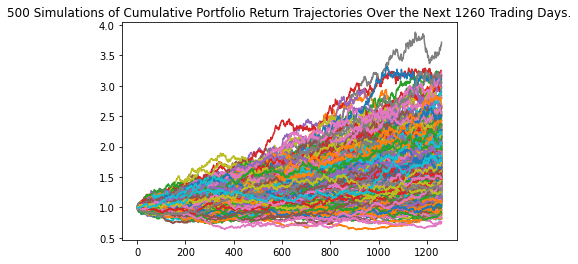

In [283]:
# Plot simulation outcomes
five_yr_lineplot = MC_five_year.plot_simulation()

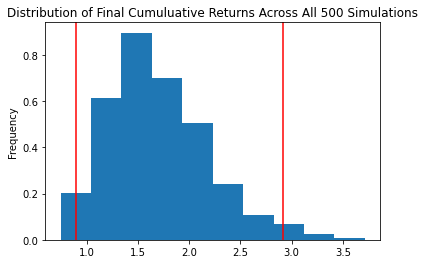

In [285]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [286]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_five_tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(stats_five_tbl)

count           500.000000
mean              1.694447
std               0.492630
min               0.743107
25%               1.353971
50%               1.630244
75%               1.982510
max               3.715656
95% CI Lower      0.895383
95% CI Upper      2.919363
Name: 1260, dtype: float64


In [289]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats_five_tbl[8]*initial_investment_five,2)
ci_upper_five = round(stats_five_tbl[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53722.97 and $175161.79


### Ten Years Retirement Option

In [290]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = my_df_ticker,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [291]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000533,0.993979,1.002154,0.998040,1.003090,0.996536,1.003700,0.986689,1.006827,1.003246,...,0.988988,1.008063,1.016215,0.999078,1.011452,1.009437,0.993900,1.025620,0.999535,1.001362
2,0.993166,0.983842,1.009661,1.001161,0.992182,0.989975,0.997831,0.987920,1.001854,0.997116,...,0.979605,1.017869,1.017084,0.993896,1.009127,1.005137,0.987902,1.015476,0.986644,0.992385
3,0.992001,0.991290,0.995290,1.006817,0.988400,0.982472,0.995929,0.989154,0.999262,0.995127,...,0.982749,1.022202,1.022169,0.994774,1.008099,1.023547,0.984628,1.004122,0.989634,0.989907
4,0.994741,1.002062,1.009984,1.000837,1.005688,0.972237,0.993698,1.001141,1.009656,0.990898,...,0.980797,1.015121,1.019520,0.987574,1.007624,1.017031,0.985783,0.988954,1.001597,0.995696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.866909,1.513471,2.923351,3.818888,1.999742,1.586185,5.534777,2.095794,2.705979,2.453488,...,2.356706,3.686363,3.071456,1.706048,3.259959,4.419184,2.200217,1.980062,2.648328,3.545581
2517,1.866005,1.511545,2.902063,3.787422,2.013521,1.572111,5.494856,2.063176,2.737441,2.428822,...,2.388545,3.674689,3.122390,1.719628,3.231016,4.438459,2.186800,2.004646,2.614605,3.520203
2518,1.860983,1.518575,2.872337,3.764773,2.009402,1.574615,5.503266,2.077681,2.798980,2.460818,...,2.394736,3.705731,3.144671,1.696454,3.225545,4.432626,2.207849,2.003106,2.604675,3.483424
2519,1.865893,1.508750,2.932042,3.729329,2.009986,1.592373,5.472319,2.072823,2.799561,2.472751,...,2.415164,3.703369,3.161791,1.712800,3.253590,4.448331,2.196906,2.020180,2.620649,3.518602


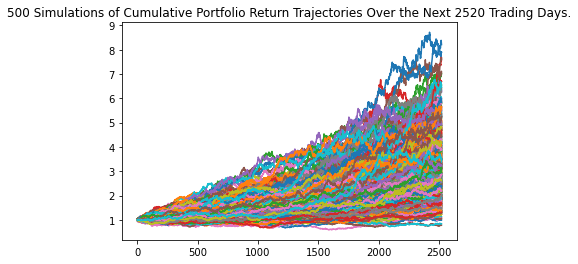

In [292]:
# Plot simulation outcomes
ten_yr_lineplot = MC_ten_year.plot_simulation()

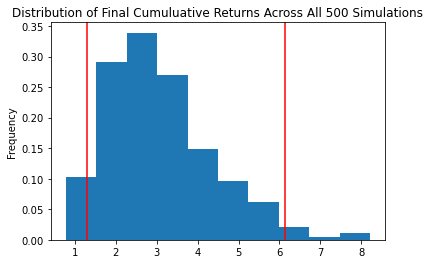

In [294]:
# Plot probability distribution and confidence intervals
ten_dist_plot = MC_ten_year.plot_distribution()

In [295]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_ten_tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(stats_ten_tbl)

count           500.000000
mean              3.084197
std               1.297607
min               0.782201
25%               2.104470
50%               2.855407
75%               3.784955
max               8.214291
95% CI Lower      1.293225
95% CI Upper      6.131602
Name: 2520, dtype: float64


In [296]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats_ten_tbl[8]*initial_investment_ten,2)
ci_upper_ten = round(stats_ten_tbl[9]*initial_investment_ten,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $77593.5 and $367896.13
